##**DATA ANALYSIS AND VISUALIZATION**

### **EXPLORATORY DATA ANALYSIS**
We will explore the data to see what it contains and how this will help us process the data to provide answers to our key questions.

In [ ]:
merged_data.head()

,primary_title,start_year,runtime_minutes,genres,vote_average,vote_count,Top Cast,Director,popularity,Budget,Revenue,genres_list
0,#ALLMYMOVIES,2015,84.583491,Documentary,9.0,4,Shia LaBeouf,Luke Turner,0.840,5.483830e+06,0.000000e+00,[Documentary]
1,#Captured,2017,81.000000,Thriller,3.2,6,"Lizze Gordon, Cody Renee Cameron, Eve Marlowe,...",Joe Homokay,1.418,8.127856e+06,0.000000e+00,[Thriller]
2,#FollowFriday,2016,90.000000,Thriller,3.2,7,"Courtney Lakin, Joseph Poliquin, Ashley Bratch...",Micho Rutare,1.646,8.127856e+06,0.000000e+00,[Thriller]
3,#Horror,2015,101.000000,"Crime,Drama,Horror",3.3,102,"Chloë Sevigny, Timothy Hutton, Natasha Lyonne,...",Tara Subkoff,6.099,1.500000e+06,1.578769e+07,"[Crime, Drama, Horror]"
4,#Lucky Number,2015,80.000000,Comedy,6.0,2,"Tom Pelphrey, Natalie Hall, Method Man, Malcol...",Brendan Gabriel Murphy,0.919,1.000000e+06,0.000000e+00,[Comedy]


In [ ]:
merged_data.columns

Index(['primary_title', 'start_year', 'runtime_minutes', 'genres',
       'vote_average', 'vote_count', 'Top Cast', 'Director', 'popularity',
       'Budget', 'Revenue', 'genres_list'],
      dtype='object')

In [ ]:
merged_data.describe()

,start_year,runtime_minutes,vote_average,vote_count,popularity,Budget,Revenue
count,15364.000000,15364.000000,15364.000000,15364.000000,15364.000000,1.536400e+04,1.536400e+04
mean,2014.183871,93.279382,5.796596,262.526686,3.736069,1.030686e+07,1.972235e+07
std,2.527871,24.651419,1.764980,1127.153963,4.894647,2.126278e+07,9.106029e+07
min,2010.000000,1.000000,0.000000,1.000000,0.600000,1.000000e+00,0.000000e+00
25%,2012.000000,84.000000,5.000000,2.000000,0.655750,4.936315e+06,0.000000e+00
50%,2014.000000,91.000000,6.000000,7.000000,1.688000,6.574482e+06,0.000000e+00
75%,2016.000000,101.000000,6.900000,48.000000,5.436250,8.198899e+06,5.513828e+05
max,2021.000000,1834.000000,10.000000,22186.000000,80.773000,3.790000e+08,2.923706e+09


In [ ]:
merged_data.shape

(15364, 12)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15364 entries, 0 to 15368
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    15364 non-null  object 
 1   start_year       15364 non-null  int64  
 2   runtime_minutes  15364 non-null  float64
 3   genres           15364 non-null  object 
 4   vote_average     15364 non-null  float64
 5   vote_count       15364 non-null  int64  
 6   Top Cast         15364 non-null  object 
 7   Director         15364 non-null  object 
 8   popularity       15364 non-null  float64
 9   Budget           15364 non-null  float64
 10  Revenue          15364 non-null  float64
 11  genres_list      15364 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


### **DATA VISUALIZATION**

#### Pairplot for numerical columns

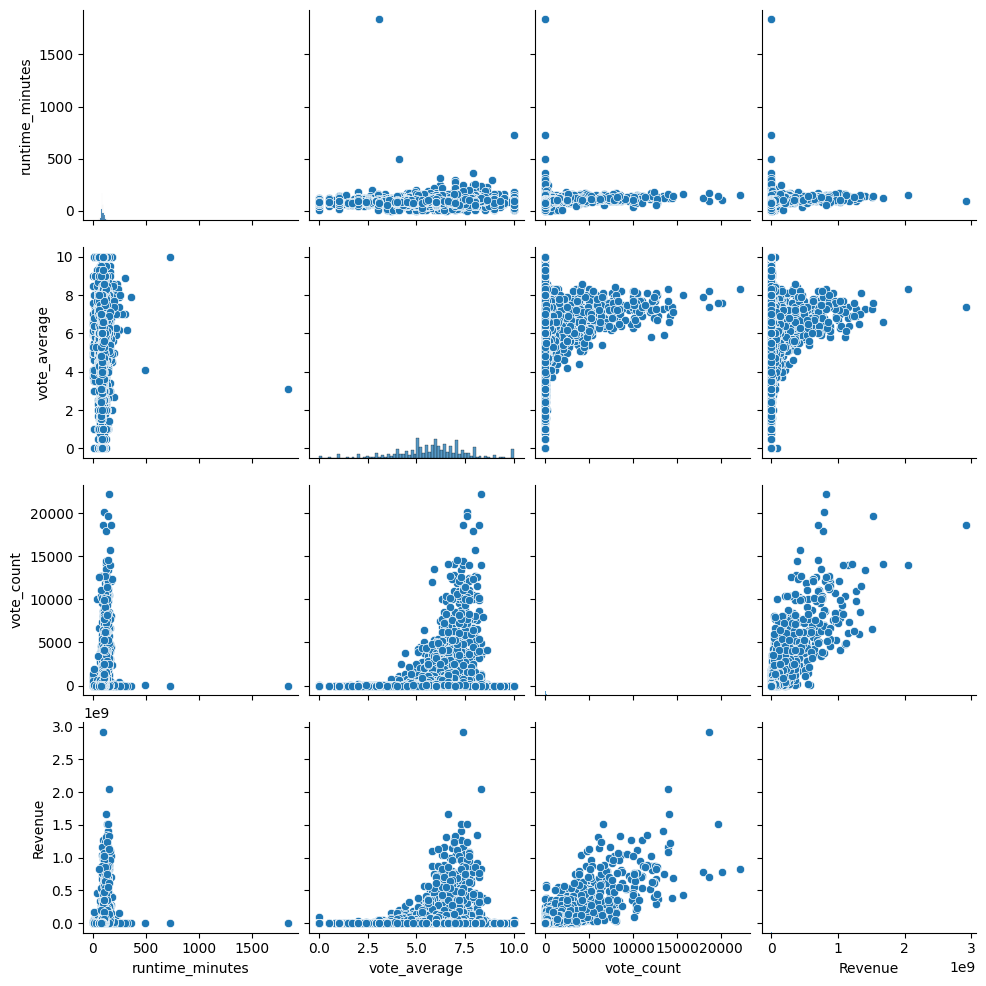

In [ ]:
sns.pairplot(merged_data[['runtime_minutes', 'vote_average', 'vote_count', 'Revenue']])
plt.show()

This pairplot shows the relationships between numerical variables like runtime, vote average, vote count, and revenue. Each scatterplot highlights how these variables are related, while the diagonal shows their distributions. This analysis helps identify patterns, such as how runtime or vote count might impact revenue, providing insights for successful movie production.

#### Revenue by Genre

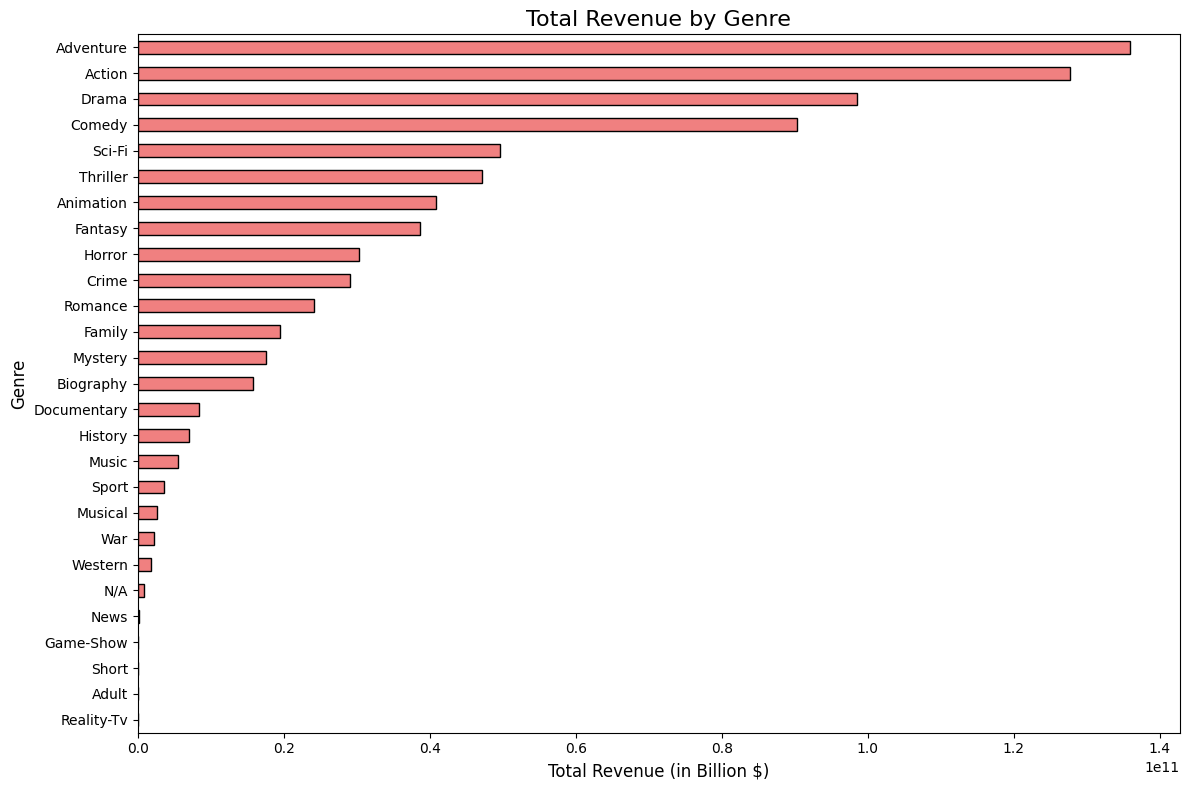

In [ ]:
#Total Revenue by Genre
# Split the 'genres' column
merged_data['genres_list'] = merged_data['genres'].apply(lambda x: x.split(','))

# Explode the 'genres_list' column to create one row per genre
exploded_data = merged_data.explode('genres_list')

# Clean and standardize genres
exploded_data['genres_list'] = exploded_data['genres_list'].str.strip().str.title()

# Group by genre and calculate the total revenue
total_revenue_by_genre = exploded_data.groupby('genres_list')['Revenue'].sum().sort_values(ascending=True)

# Histogram of total revenue per genre
plt.figure(figsize=(12, 8))
total_revenue_by_genre.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title("Total Revenue by Genre", fontsize=16)
plt.xlabel("Total Revenue (in Billion $)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


This bar chart shows the total revenue generated by each movie genre. The horizontal bars represent the cumulative revenue for each genre, helping us identify which genres perform best overall. These insights will guide the studio in prioritizing genres that generate the highest total revenue.

#### Distribution of Revenue by Genre Groups

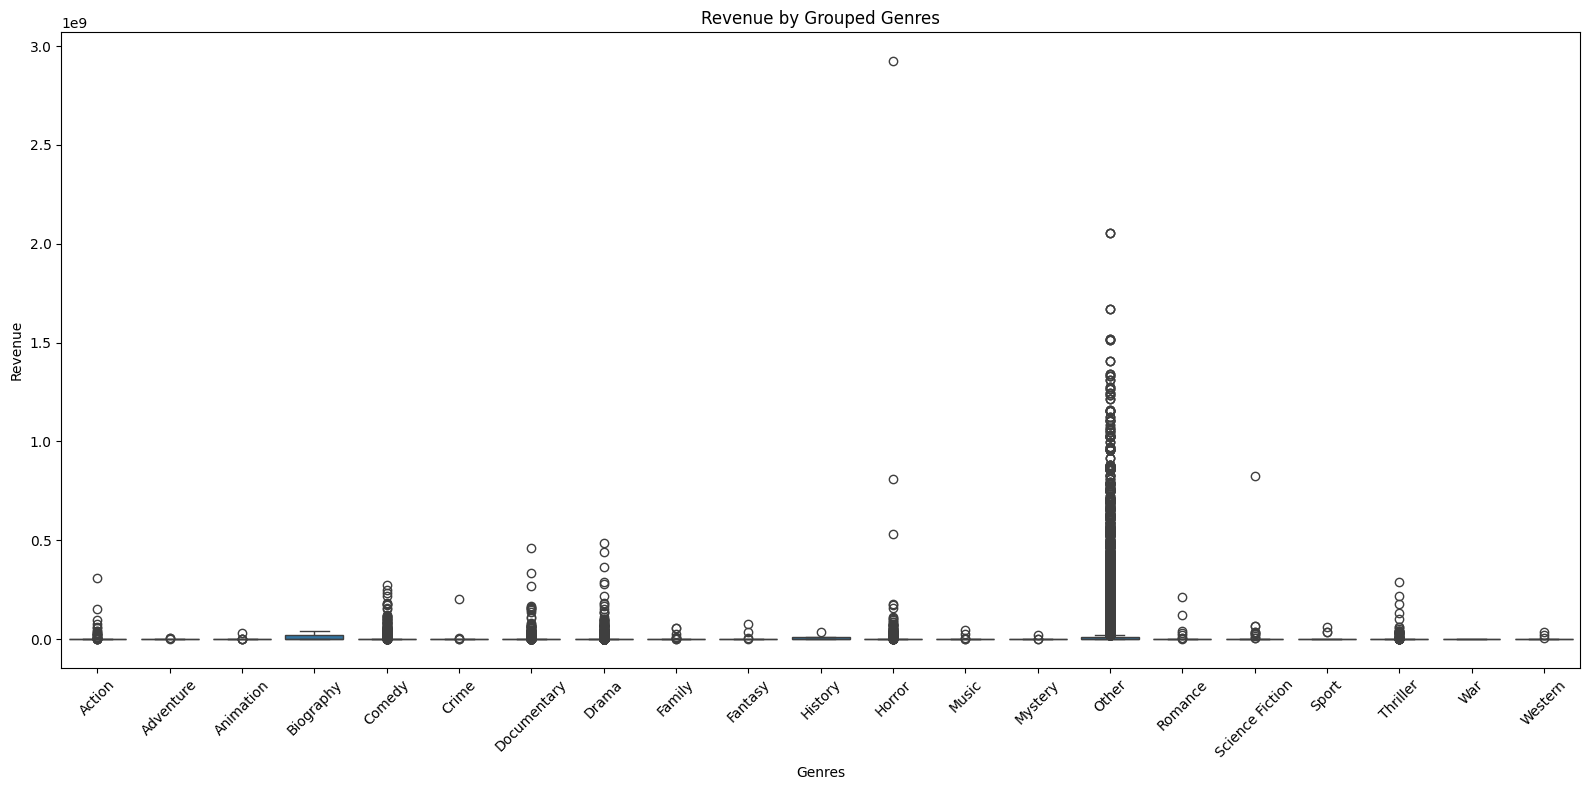

In [ ]:
# Define a mapping for broader genre categories
genre_mapping = {
    'Action': 'Action',
    'Adventure': 'Adventure',
    'Animation': 'Animation',
    'Biography': 'Biography',
    'Comedy': 'Comedy',
    'Crime': 'Crime',
    'Documentary': 'Documentary',
    'Drama': 'Drama',
    'Family': 'Family',
    'Fantasy': 'Fantasy',
    'History': 'History',
    'Horror': 'Horror',
    'Music': 'Music',
    'Musical': 'Music',
    'Mystery': 'Mystery',
    'Romance': 'Romance',
    'Sci-Fi': 'Science Fiction',
    'Science Fiction': 'Science Fiction',
    'Sport': 'Sport',
    'Thriller': 'Thriller',
    'War': 'War',
    'Western': 'Western',
}

# Clean genres by mapping to broader categories
exploded_data['genres'] = exploded_data['genres'].map(lambda x: genre_mapping.get(x, 'Other'))

# Boxplot of Revenue by Grouped Genres
plt.figure(figsize=(16, 8))
sns.boxplot(data=exploded_data, x='genres', y='Revenue', order=sorted(exploded_data['genres'].unique()))
plt.xticks(rotation=45)
plt.title('Revenue by Grouped Genres')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


This boxplot shows how revenue varies across different movie genres. Each box represents the spread of revenues for a specific genre, with the line inside showing the median revenue. By comparing genres, we can identify which ones tend to generate higher revenues, helping us focus on profitable genres for our new studio.

#### Correlation Heatmap for Budget, Revenue and Runtime

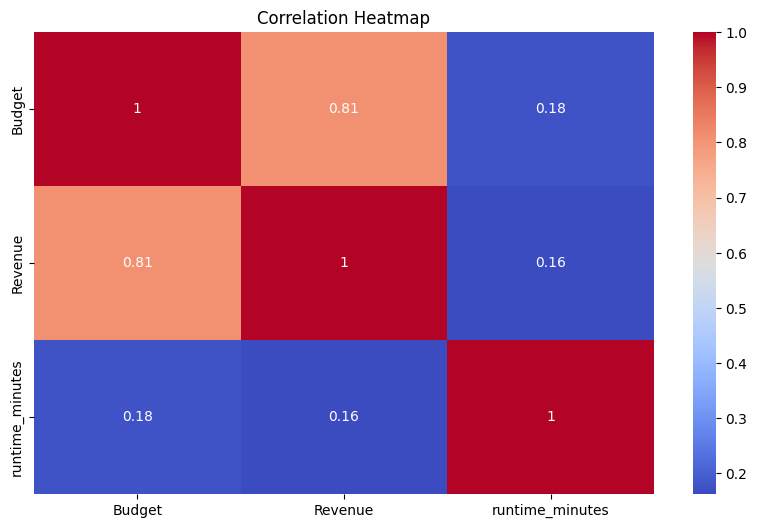

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = merged_data[['Budget', 'Revenue', 'runtime_minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()